Applying PCA on MNIST Dataset

In [129]:
import pandas as pd
import numpy as np

In [130]:
df = pd.read_csv('train.csv')

In [131]:
df.shape

(42000, 785)

In [132]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df.sample(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2634,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4575,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13833,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28212,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20005,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12909,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25429,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33610,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34504,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
import matplotlib.pyplot as plt

confirming random image

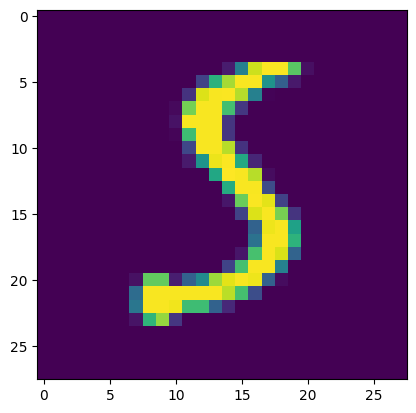

In [135]:
plt.imshow(df.iloc[3076, 1:].values.reshape(28,28))

In [136]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 23)

In [138]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4943,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
X_train.shape

(33600, 784)

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
X_train.isna().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [142]:
df.dropna(inplace=True)

In [143]:
knn = KNeighborsClassifier()

In [144]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [145]:
#measuring the time
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

18.90501642227173


In [146]:
from sklearn.metrics import accuracy_score

In [147]:
accuracy_score(y_test,y_pred)

0.9671428571428572

Now applying pca

In [148]:
#standardizing the data first is the main step in pca

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [150]:
X_train_transform = scaler.fit_transform(X_train)
X_test_transform = scaler.transform(X_test)

In [151]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [152]:
X_train_transform = pca.fit_transform(X_train_transform)

In [153]:
X_test_transform = pca.transform(X_test_transform)

In [154]:
knn = KNeighborsClassifier()

In [155]:
knn.fit(X_train_transform,y_train)

KNeighborsClassifier()

In [156]:
y_pred_transform = knn.predict(X_test_transform)

In [157]:
accuracy_score(y_test,y_pred_transform)

0.9477380952380953

In [159]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [160]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()